In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.1.0
TFP version: 0.9.0


In [2]:
# Additional imports and setting fixed random seed to have reproducibility

import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
tf.random.set_seed(42)

# Tensorflow Probability Distributions

## Coding Tutorials
#### 1. [Univariate Distributions](#univariate_distributions)
#### 2. [Multivariate Distributions](#multivariate_distributions)
#### 3. [The Independent Distribution](#the_independent_distribution)
#### 4. [Sampling and log probs](#sampling_and_log_probs)
#### 5. [Trainable Distributions](#trainable_distributions)

***
## Univariate distributions
<a id='univariate_distributions'></a>

In [3]:
# Create a normal distribution from Tensorflow Distributions
loc = 1
scale = 2
uni_normal = tfd.Normal(loc=loc, scale=scale)
uni_normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [4]:
# Sample from the chosen distribution...

uni_normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=1.654937>

In [5]:
# ... or sample multiple times

n_samples = 10
uni_normal.sample(n_samples)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 1.1684492 , -0.7218075 ,  1.7562461 ,  0.98960745,  0.01093608,
        2.2356384 ,  0.33835906,  0.99723184,  0.1525318 , -1.7744174 ],
      dtype=float32)>

In [6]:
# Obtain value of probability's density

pdf_x = 0
uni_normal.prob(pdf_x)

<tf.Tensor: shape=(), dtype=float32, numpy=0.17603266>

In [7]:
# Compare with the PDF of the Gaussian distribution

def my_gaussian(loc=0, scale=1, use_log=False):
    pdf_value = 1 / (np.sqrt(2*np.pi) * scale) * np.exp(-0.5 * ((pdf_x - loc) / scale) ** 2)
    return np.log(pdf_value) if use_log else pdf_value

In [8]:
normal_pdf_y_numpy = my_gaussian(loc, scale, use_log=False)
normal_pdf_y_numpy

0.17603266338214976

In [9]:
# Obtain value of logprobability

uni_normal.log_prob(pdf_x)

<tf.Tensor: shape=(), dtype=float32, numpy=-1.7370857>

In [10]:
# Verify that this really is the log of the probability

normal_log_pdf_y_numpy = my_gaussian(loc, scale, use_log=True)
normal_log_pdf_y_numpy

-1.7370857137646178

(array([0.00107796, 0.00107796, 0.00143728, 0.00251523, 0.00287455,
        0.00503046, 0.01042026, 0.01221684, 0.01545071, 0.01652867,
        0.03162006, 0.04778941, 0.03952511, 0.0614435 , 0.07761291,
        0.09737541, 0.09917201, 0.11031092, 0.13474458, 0.15810032,
        0.16313078, 0.1710358 , 0.19511017, 0.19475087, 0.19439151,
        0.19978129, 0.19978129, 0.17498836, 0.18397118, 0.15306997,
        0.14516482, 0.12683956, 0.11641931, 0.09234495, 0.07940947,
        0.06395876, 0.04707081, 0.04275891, 0.03090145, 0.02766753,
        0.016888  , 0.01796596, 0.01113888, 0.00718638, 0.00467114,
        0.0017966 , 0.00251523, 0.00071864, 0.00035932, 0.00107796]),
 array([-5.869788  , -5.591484  , -5.3131795 , -5.0348754 , -4.756571  ,
        -4.4782667 , -4.199962  , -3.921658  , -3.6433537 , -3.3650494 ,
        -3.086745  , -2.8084407 , -2.5301363 , -2.2518322 , -1.9735278 ,
        -1.6952236 , -1.4169192 , -1.1386149 , -0.8603106 , -0.5820063 ,
        -0.30370197, -0.02

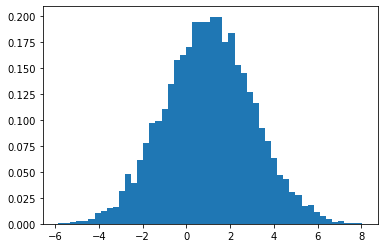

In [11]:
# Plot a histogram, approximating the density

plt.hist(uni_normal.sample(10000).numpy(), bins=50, density=True)

In [12]:
# Do the same for the exponential distribution

rate = 1
exponential = tfd.Exponential(rate=rate)
exponential

<tfp.distributions.Exponential 'Exponential' batch_shape=[] event_shape=[] dtype=float32>

(array([9.07953851e-01, 7.51345794e-01, 5.86814116e-01, 4.43722826e-01,
        3.96181095e-01, 3.18809258e-01, 2.43301802e-01, 1.95760070e-01,
        1.60802915e-01, 1.30972809e-01, 1.05337562e-01, 8.06345052e-02,
        6.10584982e-02, 4.94061130e-02, 4.38129682e-02, 4.10163957e-02,
        2.88979152e-02, 2.05081979e-02, 1.39828466e-02, 9.78801440e-03,
        1.39828466e-02, 1.02541103e-02, 1.07201824e-02, 6.52534293e-03,
        7.92361310e-03, 3.26267147e-03, 3.72875910e-03, 1.86438370e-03,
        9.32189776e-04, 1.86438370e-03, 2.79656933e-03, 1.39828777e-03,
        9.32189776e-04, 4.66095924e-04, 1.86437955e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.66095924e-04, 1.39828156e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.66095924e-04]),
 array([3.1948599e-05, 2.1458030e-01, 4.2912865e-01, 6.4367700e-01,
        8.5822535e-01, 1.0

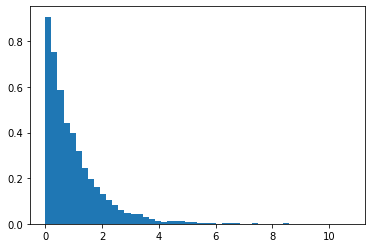

In [13]:
# Sample as before

plt.hist(exponential.sample(10000).numpy(), bins=50, density=True)

In [14]:
# Create a Bernoulli distribution (discrete)

prob = 0.7
bernoulli = tfd.Bernoulli(probs=prob)
bernoulli

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[] event_shape=[] dtype=int32>

In [15]:
bernoulli_samples = bernoulli.sample(10000)
bernoulli_samples

<tf.Tensor: shape=(10000,), dtype=int32, numpy=array([0, 1, 1, ..., 0, 1, 1])>

In [16]:
sum(bernoulli_samples.numpy() > 0) / len(bernoulli_samples)

0.7083

#### A word of caution on discrete distributions

In [17]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability!

for k in [0, 0.5, 1, -1]:
    print('prob result {} for k = {} '.format(bernoulli.prob(k), k))

prob result 0.30000001192092896 for k = 0 
prob result 0.4582575857639313 for k = 0.5 
prob result 0.6999999284744263 for k = 1 
prob result 0.12857142090797424 for k = -1 


In [18]:
# Replicate the scores to see what is occurring under the hood

def my_bernoulli(p_success, k):
    return np.power(p_success,k)*np.power((1-p_success),(1-k))

In [19]:
# Evaluate it as before

for k in [0, 0.5, 1, -1]:
    print('prob result {} for k = {} '.format(my_bernoulli(prob, k), k))

prob result 0.30000000000000004 for k = 0 
prob result 0.45825756949558405 for k = 0.5 
prob result 0.7 for k = 1 
prob result 0.12857142857142861 for k = -1 


#### Work with batch distributions

In [20]:
# Create a batched Bernoulli distribution

bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [21]:
# Sample from it, noting the shape

n_samples = 10
bernoulli_batch.sample(n_samples)

<tf.Tensor: shape=(10, 5), dtype=int32, numpy=
array([[0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1]])>

In [22]:
# Use a batch shape with higher rank

probs = [[[0.5, 0.5], 
          [0.8, 0.3], 
          [0.25, 0.75]]]
bernoulli_batch_3d = tfd.Bernoulli(probs=probs)
bernoulli_batch_3d

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [23]:
# Sample from this batch of distributions

n_samples = 10
bernoulli_batch_3d.sample(n_samples)

<tf.Tensor: shape=(10, 1, 3, 2), dtype=int32, numpy=
array([[[[1, 0],
         [1, 1],
         [0, 1]]],


       [[[0, 1],
         [1, 1],
         [0, 1]]],


       [[[0, 0],
         [1, 1],
         [1, 0]]],


       [[[1, 0],
         [1, 0],
         [0, 0]]],


       [[[1, 0],
         [1, 0],
         [0, 1]]],


       [[[0, 1],
         [1, 1],
         [0, 1]]],


       [[[1, 0],
         [0, 1],
         [1, 0]]],


       [[[0, 0],
         [1, 0],
         [0, 1]]],


       [[[0, 1],
         [1, 1],
         [0, 1]]],


       [[[1, 0],
         [1, 0],
         [0, 0]]]])>

In [24]:
# Determine probabilities from this batch distribution

bernoulli_batch_3d.prob([[[1, 0], 
                         [0, 0], 
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5      , 0.5      ],
        [0.2      , 0.6999999],
        [0.25     , 0.75     ]]], dtype=float32)>

***
<a id='multivariate_distributions'></a>
## Multivariate Distributions


#### Basic multivariate distributions

In [25]:
# Define 2D multivariate Gaussian with diagonal covariance matrix

locs = [1, 3]
scales_diag = [2, 1]
multi_normal_diag = tfd.MultivariateNormalDiag(loc=locs, scale_diag=scales_diag)
multi_normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [26]:
# Sample from it

n_samples = 10
multi_normal_diag.sample(n_samples)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 3.288419  ,  1.3910213 ],
       [-1.694444  ,  2.3830664 ],
       [ 2.6909313 ,  3.1574626 ],
       [ 0.49496585,  3.9559474 ],
       [ 3.9159768 ,  2.7126741 ],
       [ 2.8516407 ,  3.4794748 ],
       [ 0.8085401 ,  3.1609654 ],
       [ 2.4466426 ,  2.9423585 ],
       [ 0.8609709 ,  3.452149  ],
       [ 2.634784  ,  2.5413036 ]], dtype=float32)>

Text(0, 0.5, 'x2')

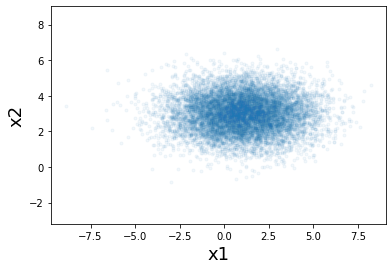

In [27]:
# Make a plot

plt_sample = multi_normal_diag.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)

#### Batches of multivariate distributions

In [28]:
# Create three "batches" of multivariate normals

locs = [[0, 0], [5, 0], [5, 5]]
scales_diag = [[1, 1], [4, 1], [1, 4]]
multi_normal_diag_batch = tfd.MultivariateNormalDiag(loc=locs, scale_diag=scales_diag)

In [29]:
# Sample from it

n_samples = 10
multi_normal_diag_batch.sample(n_samples)

<tf.Tensor: shape=(10, 3, 2), dtype=float32, numpy=
array([[[-1.5440758 ,  1.3154334 ],
        [ 8.12323   ,  1.0706282 ],
        [ 4.034321  ,  6.0052867 ]],

       [[-1.8545105 ,  1.4713811 ],
        [ 2.0660353 , -0.344911  ],
        [ 4.2337008 , 10.22172   ]],

       [[-0.0578156 ,  0.17457157],
        [ 5.6911297 , -0.3467844 ],
        [ 5.6945953 , 12.057819  ]],

       [[ 1.7431762 , -1.2393949 ],
        [-1.3699932 , -4.5134735 ],
        [ 7.6479917 , 10.809378  ]],

       [[ 0.24647596,  1.0909393 ],
        [12.980251  , -1.4023894 ],
        [ 5.274681  , -0.16955376]],

       [[-0.3221189 , -0.23839359],
        [-0.5284691 ,  0.02630435],
        [ 4.821647  ,  3.5029914 ]],

       [[ 0.5566287 , -2.0874217 ],
        [-1.3238783 , -0.31384054],
        [ 4.7123284 ,  8.283987  ]],

       [[ 1.6065929 ,  1.6575363 ],
        [ 2.1968822 , -0.8002647 ],
        [ 3.3598597 ,  5.814961  ]],

       [[-1.1928858 , -0.6602714 ],
        [ 5.0389686 ,  0.6254517

In [30]:
# Compute log probs

multi_normal_diag_batch.log_prob([[0, 0], [1, 2], [2, 1]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.837877 , -5.7241716, -8.224172 ], dtype=float32)>

In [31]:
# Create a sample for a plot -- notice the shape

plt_sample_batch = multi_normal_diag_batch.sample(10000)

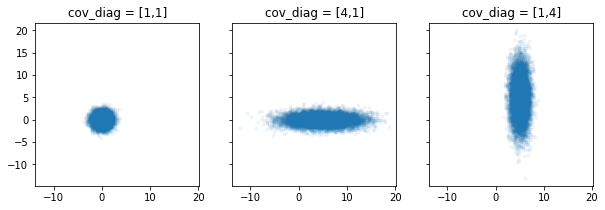

In [32]:
# Plot samples from the batched multivariate Gaussian

fig, axs = (plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3)))
titles = ['cov_diag = [{:s}]'.format(','.join(str(d) for d in sd)) for sd in scales_diag]

for i, (ax, title) in enumerate(zip(axs, titles)):
    samples = plt_sample_batch[:, i, :]  # take the ith batch [samples x event_shape]
    ax.scatter(samples[:, 0], samples[:, 1], marker='.', alpha=0.05)
    ax.set_title(title)
plt.show()



***
<a id='the_independent_distribution'></a>
## The Independent Distribution

In [33]:
# Start by defining a batch of two univariate Gaussians, then
# combine them into a bivariate Gaussian with independent components

locs = [0, 1]
scales = [1, 0.5]
batch_of_normals = tfd.Normal(loc=locs, scale=scales)
batch_of_normals

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

c:\programdata\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\programdata\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


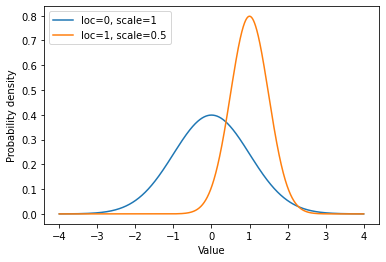

In [34]:
# Univariate density functions

import seaborn as sns

t = np.linspace(-4, 4, 10000)
densities = batch_of_normals.prob(np.repeat(t[:, np.newaxis], 2, axis=1))  # each column is a vector of densities for one distn

sns.lineplot(t, densities[:, 0], label='loc={}, scale={}'.format(locs[0], scales[0]))
sns.lineplot(t, densities[:, 1], label='loc={}, scale={}'.format(locs[1], scales[1]))
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend()
plt.show()

In [35]:
# Check their batch_shape and event_shape

print('batch_shape of batch_of_normals is:', batch_of_normals.batch_shape)
print('event_shape of batch_of_normals is:', batch_of_normals.event_shape)

batch_shape of batch_of_normals is: (2,)
event_shape of batch_of_normals is: ()


In [36]:
# Use Independent to convert the batch shape to the event shape

bivariate_normal_from_independent = tfd.Independent(batch_of_normals, reinterpreted_batch_ndims=1)
bivariate_normal_from_independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

In [37]:
# Note that dimension from batch_shape has shifted to event_shape

print('batch_shape of bivariate_normal_from_independent is:', bivariate_normal_from_independent.batch_shape)
print('event_shape of bivariate_normal_from_independent is:', bivariate_normal_from_independent.event_shape)

batch_shape of bivariate_normal_from_independent is: ()
event_shape of bivariate_normal_from_independent is: (2,)


c:\programdata\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


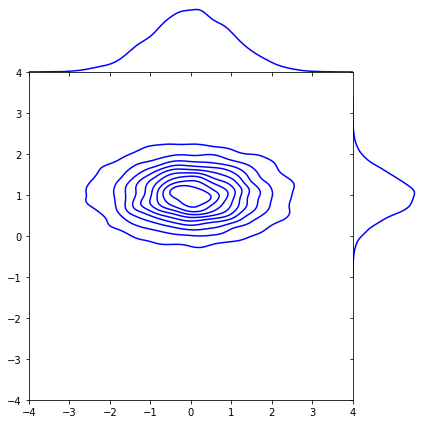

In [38]:
# Create a plot showing joint density contours and marginal density functions

samples = bivariate_normal_from_independent.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

In [39]:
# Use MultivariateNormalDiag to create the equivalent distribution
# Note that diagonal covariance matrix => no correlation => independence (for the multivariate normal distribution)

bivariate_normal_from_multivariate = tfd.MultivariateNormalDiag(loc=locs, scale_diag=scales)
bivariate_normal_from_multivariate

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

c:\programdata\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


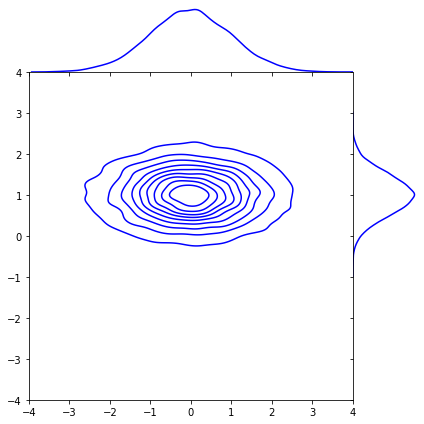

In [40]:
# Plot the joint density function of bivariate_normal_from_multivariate
# Refer back to bivariate_normal_from_independent to show that the plot is the same
# Summarise how Independent has been used

samples = bivariate_normal_from_multivariate.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

#### Shifting batch dimensions to event dimensions using 
`reinterpreted_batch_ndims`

In [41]:
# Demonstrate use of reinterpreted_batch_ndims
# By default all batch dims except the first are transferred to event dims

loc_grid = [[-100., -100.],
            [100., 100.],
            [0., 0.]]
scale_grid = [[1., 10.],
              [1., 10.],
              [1., 1.]]

normals_batch_3by2_event_scalar = tfd.Normal(loc=loc_grid, scale=scale_grid)
normals_batch_3by2_event_scalar

<tfp.distributions.Normal 'Normal' batch_shape=[3, 2] event_shape=[] dtype=float32>

In [42]:
# Evaluate log_prob

pdf_x = [[-80, -80],
         [80, 80],
         [5, 5]]
normals_batch_3by2_event_scalar.log_prob(pdf_x)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-200.91895 ,   -5.221524],
       [-200.91895 ,   -5.221524],
       [ -13.418939,  -13.418939]], dtype=float32)>

In [43]:
tf.reduce_sum(normals_batch_3by2_event_scalar.log_prob(pdf_x), axis=1)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-206.14047 , -206.14047 ,  -26.837877], dtype=float32)>

In [44]:
tf.reduce_sum(normals_batch_3by2_event_scalar.log_prob(pdf_x))

<tf.Tensor: shape=(), dtype=float32, numpy=-439.11884>

In [45]:
# We now have a batch of 3 bivariate normal distributions,
# each parametrised by a column of our original parameter grid

normals_batch_3by2_event_2 = tfd.Independent(normals_batch_3by2_event_scalar, reinterpreted_batch_ndims=1)
normals_batch_3by2_event_2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

In [46]:
# Evaluate log_prob

normals_batch_3by2_event_2.log_prob(pdf_x)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-206.14047 , -206.14047 ,  -26.837877], dtype=float32)>

In [47]:
# Can reinterpret all batch dimensions as event dimensions

normals_batch_3by2_event_3by2 = tfd.Independent(normals_batch_3by2_event_scalar, reinterpreted_batch_ndims=2)
normals_batch_3by2_event_3by2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[3, 2] dtype=float32>

In [48]:
# Take log_probs 

normals_batch_3by2_event_3by2.log_prob(pdf_x)

<tf.Tensor: shape=(), dtype=float32, numpy=-439.11884>

#### Using `Independent` to build a Naive Bayes classifier

#### Introduction to `newsgroups` data set

In this tutorial, just load the dataset, fetch train/test splits, probably choose a subset of the data.

Construct the class conditional feature distribution (with Independent, using the Naive Bayes assumption) and sample from it.

We can just use the ML estimates for parameters, in later tutorials we will learn them.

In [49]:
# Convenience function for retrieving the 20 newsgroups data set

# Usenet was a forerunner to modern internet forums
# Users could post and read articles
# Newsgroup corresponded to a topic
# Example topics in this data set: IBM computer hardware, baseball
# Our objective is to use an article's contents to predict its newsgroup,
# a 20-class classification problem.

# 18000 newsgroups, posts on 20 topics

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
# Get the train data

data_root = './'
newsgroups_data = fetch_20newsgroups(data_home=data_root, subset='train')

In [51]:
dir(newsgroups_data)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [52]:
# More information about the data set

print(newsgroups_data.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [53]:
# Example article

print(newsgroups_data.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [54]:
print('Number of classes:', len(set(newsgroups_data.target)))

Number of classes: 20


In [55]:
# Associated label

print(newsgroups_data.target[0])

7


In [56]:
# Name of label

print(newsgroups_data.target_names[newsgroups_data.target[0]])

rec.autos


In [57]:
# Preprocessing boilerplate

n_documents = len(newsgroups_data.data)
print('Number of articles:', n_documents)

count_vectorizer = CountVectorizer(input='content', binary=True,
                                   max_df=0.25, min_df=1.01/n_documents)  # ignore common words, words that appear once
binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_data.data)  # input is a list of strings

Number of articles: 11314


In [58]:
# Check vocabulary

print('Vocabulary size:', len(count_vectorizer.vocabulary_))
{key: value for i, (key, value) in enumerate(count_vectorizer.vocabulary_.items()) if i < 10}

Vocabulary size: 56365


{'lerxst': 31701,
 'wam': 53950,
 'umd': 51879,
 'where': 54371,
 'thing': 50255,
 'car': 13607,
 'rac3': 42078,
 'maryland': 33453,
 'college': 15293,
 'park': 38822}

In [59]:
# Check shape

print('Type of binary_bag_of_words:', type(binary_bag_of_words))
binary_bag_of_words.shape

Type of binary_bag_of_words: <class 'scipy.sparse.csr.csr_matrix'>


(11314, 56365)

In [60]:
# Check that the fit has been successful

print(binary_bag_of_words[0])
count_vectorizer.inverse_transform(binary_bag_of_words[0])

  (0, 31701)	1
  (0, 53950)	1
  (0, 51879)	1
  (0, 54371)	1
  (0, 50255)	1
  (0, 13607)	1
  (0, 42078)	1
  (0, 33453)	1
  (0, 15293)	1
  (0, 38822)	1
  (0, 1412)	1
  (0, 54828)	1
  (0, 9213)	1
  (0, 16472)	1
  (0, 21034)	1
  (0, 45006)	1
  (0, 17643)	1
  (0, 19514)	1
  (0, 47623)	1
  (0, 32330)	1
  (0, 31356)	1
  (0, 5135)	1
  (0, 20173)	1
  (0, 5639)	1
  (0, 13411)	1
  :	:
  (0, 7905)	1
  (0, 23639)	1
  (0, 12770)	1
  (0, 45705)	1
  (0, 43490)	1
  (0, 11973)	1
  (0, 49889)	1
  (0, 35014)	1
  (0, 36078)	1
  (0, 20995)	1
  (0, 47438)	1
  (0, 55820)	1
  (0, 41015)	1
  (0, 32954)	1
  (0, 26465)	1
  (0, 54347)	1
  (0, 28171)	1
  (0, 23782)	1
  (0, 32332)	1
  (0, 40028)	1
  (0, 33027)	1
  (0, 50121)	1
  (0, 27557)	1
  (0, 12556)	1
  (0, 36384)	1


[array(['lerxst', 'wam', 'umd', 'where', 'thing', 'car', 'rac3',
        'maryland', 'college', 'park', '15', 'wondering', 'anyone',
        'could', 'enlighten', 'saw', 'day', 'door', 'sports', 'looked',
        'late', '60s', 'early', '70s', 'called', 'bricklin', 'doors',
        'were', 'really', 'small', 'addition', 'front', 'bumper',
        'separate', 'rest', 'body', 'tellme', 'model', 'name', 'engine',
        'specs', 'years', 'production', 'made', 'history', 'whatever',
        'info', 'funky', 'looking', 'please', 'mail', 'thanks', 'il',
        'brought', 'neighborhood'], dtype='<U80')]

In [61]:
# Dict that will be useful later 

inv_vocabulary = {value: key for key, value in count_vectorizer.vocabulary_.items()}

In [62]:
{key: value for i, (key, value) in enumerate(inv_vocabulary.items()) if i < 10}

{31701: 'lerxst',
 53950: 'wam',
 51879: 'umd',
 54371: 'where',
 50255: 'thing',
 13607: 'car',
 42078: 'rac3',
 33453: 'maryland',
 15293: 'college',
 38822: 'park'}

#### A Naive Bayes classifier for `newsgroup`

Each feature vector $x$ is a list of indicators for whether a word appears in the article. $x_i$ is 1 if the $i$th word appears, and 0 otherwise. `inv_vocabulary` matches word indices $i$ to words.

Each label $y$ is a value in $0, 1, \ldots, 19$.

The parts of a naive Bayes classifier for this problem can be summarised as:  


- A probability distribution for the feature vector by class, $p(x|y = j)$ for each $j = 0, 1, \ldots, 19$. These probability distributions are assumed to have independent components: we can factorize the joint probability as a product of marginal probabilities
\begin{equation}
    p(x|y = j) = \prod_{i=1}^d p(x_i|y = j)
\end{equation}
These marginal probability distributions are Bernoulli distributions, each of which has a single parameter $\theta_{ji} := p(x_i = 1|y = j)$. This parameter is the probability of observing word $i$ in an article of class $j$. 

- We will use the Laplace smoothed maximum likelihood estimate to compute these parameters. Laplace smoothing involves adding small counts to every feature for each class. Else, if a feature did not appear in the training set of a class, but then we observed it in our test data the log probability would be undefined.

- A collection of class prior probabilities $p(y = j)$. These will be set by computing the class base rates in the training set.  


- A function for computing the probability of class membership via Bayes' theorem:  

\begin{equation}
    p(y = j|x) = \frac{p(x|y = j)p(y = j)}{p(x)}
\end{equation}

In [63]:
# Compute the parameter estimates (adjusted fraction of documents in class that contain word)

n_classes = len(set(newsgroups_data.target))
y = newsgroups_data.target
n_words = binary_bag_of_words.shape[1]

alpha = 1e-6 # parameters for Laplace smoothing

theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
for c_k in range(n_classes): # 0, 1, ..., 19
    class_mask = (y == c_k)
    N = class_mask.sum() # number of articles in class
    word_count = binary_bag_of_words[class_mask].sum(axis=0)  # occurrences of each word for the given class
    theta[c_k] = (word_count + alpha) / (N + (alpha * 2))

In [64]:
theta

array([[6.25000206e-03, 2.29166687e-02, 2.08333332e-09, ...,
        2.08333332e-09, 2.08333332e-09, 2.08333332e-09],
       [3.42465769e-02, 1.88356181e-02, 1.71232876e-09, ...,
        1.71232876e-09, 1.71232876e-09, 1.71232876e-09],
       [3.21489018e-02, 1.69204754e-02, 1.69204737e-09, ...,
        1.69204737e-09, 1.69204737e-09, 1.69204737e-09],
       ...,
       [5.14184413e-02, 1.48936171e-01, 1.77305141e-03, ...,
        1.77304964e-09, 1.77304964e-09, 1.77304964e-09],
       [3.44086042e-02, 6.45161309e-02, 2.15053763e-09, ...,
        2.15053763e-09, 2.15053763e-09, 2.15053763e-09],
       [1.06100822e-02, 1.85676418e-02, 2.65251988e-09, ...,
        2.65251988e-09, 2.65251988e-09, 2.65251988e-09]])

In [65]:
# Check whether the most probable word in each class is reasonable

most_probable_word_ix = theta.argmax(axis=1) # most probable word for each class

for j, ix in enumerate(most_probable_word_ix):
    print('Most probable word in class {} is "{}".'.format(newsgroups_data['target_names'][j],
                                                           inv_vocabulary[ix]))

Most probable word in class alt.atheism is "people".
Most probable word in class comp.graphics is "graphics".
Most probable word in class comp.os.ms-windows.misc is "windows".
Most probable word in class comp.sys.ibm.pc.hardware is "thanks".
Most probable word in class comp.sys.mac.hardware is "mac".
Most probable word in class comp.windows.x is "window".
Most probable word in class misc.forsale is "sale".
Most probable word in class rec.autos is "car".
Most probable word in class rec.motorcycles is "dod".
Most probable word in class rec.sport.baseball is "he".
Most probable word in class rec.sport.hockey is "ca".
Most probable word in class sci.crypt is "clipper".
Most probable word in class sci.electronics is "use".
Most probable word in class sci.med is "reply".
Most probable word in class sci.space is "space".
Most probable word in class soc.religion.christian is "god".
Most probable word in class talk.politics.guns is "people".
Most probable word in class talk.politics.mideast is 

In [66]:
# Define a distribution for each class

batch_of_bernoulli = tfd.Bernoulli(probs=theta)
p_x_given_y = tfd.Independent(batch_of_bernoulli, reinterpreted_batch_ndims=1)
p_x_given_y

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[20] event_shape=[56365] dtype=int32>

In [67]:
# Take a sample of words from each class

n_samples = 10
samples = p_x_given_y.sample(n_samples)
samples.shape

TensorShape([10, 20, 56365])

In [68]:
# Choose a class

chosen_class = 15
newsgroups_data['target_names'][chosen_class]

'soc.religion.christian'

In [69]:
# Indicators for words that appear in the sample

class_sample = samples[:, chosen_class]
class_sample

<tf.Tensor: shape=(10, 56365), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>

In [70]:
# Perform inverse transform to test quality of fit

count_vectorizer.inverse_transform(class_sample[0])

[array(['03', '14', '22102', '29266', '30602', '93', 'acknowledge',
        'admit', 'advantage', 'against', 'ages', 'also', 'asked', 'atoned',
        'believer', 'best', 'bible', 'biblical', 'books', 'canada',
        'cannot', 'carbon', 'caused', 'christian', 'christians',
        'computing', 'concerning', 'create', 'crushed', 'cs89mcd', 'date',
        'devil', 'did', 'doing', 'english', 'eternal', 'even', 'evidence',
        'examples', 'exists', 'fax', 'find', 'fluctuate', 'found',
        'fourth', 'genesis', 'geneva', 'got', 'harrassed', 'he', 'her',
        'his', 'historians', 'idea', 'info', 'interpretation', 'issuing',
        'jerusalem', 'jesus', 'keep', 'knew', 'last', 'least', 'life',
        'live', 'lot', 'made', 'manufacture', 'many', 'math', 'meaning',
        'members', 'mind', 'misunderstanding', 'netters', 'never',
        'nicely', 'nj', 'objection', 'oil', 'our', 'over', 'overall',
        'part', 'physical', 'portrayals', 'professed', 'really',
        'relig

***
<a id='sampling_and_log_probs'></a>
## Sampling and log probs

In [71]:
# Make Multivariate Distribution

normal_distributions = tfd.MultivariateNormalDiag(loc=[[0.5, 1], [0.1, 0], [0, 0.2]],
                                                  scale_diag=[[2, 3], [1, 3], [4, 4]])
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [72]:
# Sample

n_samples = 10
normal_distributions.sample(n_samples)

<tf.Tensor: shape=(10, 3, 2), dtype=float32, numpy=
array([[[ 2.0694826 , -0.7429162 ],
        [-0.1452356 , -4.3450727 ],
        [-6.385345  ,  1.0314193 ]],

       [[-2.22366   ,  4.604908  ],
        [-0.98679006,  1.497858  ],
        [ 3.4777088 , -6.075538  ]],

       [[-0.6812322 , -0.2708249 ],
        [ 0.0308037 ,  2.4048078 ],
        [ 0.85003436,  3.5731428 ]],

       [[ 1.1420963 ,  2.0886304 ],
        [-1.8074498 , -1.443822  ],
        [-2.7295866 ,  0.75012505]],

       [[ 1.481229  , -2.4346874 ],
        [-0.67377216,  3.83392   ],
        [ 0.81539357, -5.2484245 ]],

       [[-1.5991216 ,  3.3280497 ],
        [ 0.38134137,  3.2374713 ],
        [ 3.9279685 , -1.6538899 ]],

       [[-1.6616075 , -1.7254958 ],
        [ 1.5743065 ,  2.426102  ],
        [ 3.5873628 , -6.110475  ]],

       [[-0.05945069,  3.664042  ],
        [-0.19715157,  2.2367802 ],
        [-0.09401285, -5.207496  ]],

       [[ 0.6110578 , -5.571296  ],
        [-1.83908   , -3.646134 

In [73]:
# Multivariate Normal batched Distribution
# We are broadcasting batch shapes of `loc` and `scal_diag` 
# against each other

loc = [[[0.3, 1.5, 1.], [0.2, 0.4, 2.8]],
       [[2., 2.3, 8], [1.4, 1, 1.3]]]  # shape (2, 2, 3)
scale_diag = [0.4, 1., 0.7]
normal_distributions = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2, 2] event_shape=[3] dtype=float32>

In [74]:
# Use independent to move part of the batch shape

normal_distributions_independent = tfd.Independent(normal_distributions, reinterpreted_batch_ndims=1)
normal_distributions_independent

<tfp.distributions.Independent 'IndependentMultivariateNormalDiag' batch_shape=[2] event_shape=[2, 3] dtype=float32>

In [75]:
# Draw some samples

n_samples = 10
normal_distributions_independent.sample(n_samples)

<tf.Tensor: shape=(10, 2, 2, 3), dtype=float32, numpy=
array([[[[ 0.8105902 ,  0.84485555,  0.9972712 ],
         [ 0.38344884, -1.107044  ,  3.565277  ]],

        [[ 1.8162466 ,  1.9468151 ,  7.738292  ],
         [ 1.6310134 ,  0.718937  ,  1.4097519 ]]],


       [[[ 0.8069319 ,  0.8424324 ,  1.33918   ],
         [-0.01239181,  1.4741853 ,  2.7203062 ]],

        [[ 1.6443977 ,  0.9310142 ,  7.708164  ],
         [ 1.6273035 ,  0.87319654,  1.4861746 ]]],


       [[[-0.3169974 ,  0.876192  ,  0.6822823 ],
         [-0.07099999,  1.0963545 ,  2.3159986 ]],

        [[ 1.8285551 ,  1.9872851 ,  6.9679317 ],
         [ 1.2500392 ,  3.260276  ,  1.2032799 ]]],


       [[[ 0.21210563,  2.0418804 ,  1.8911427 ],
         [-0.3604684 ,  0.25526583,  2.6353981 ]],

        [[ 2.109381  ,  1.7905011 ,  9.216565  ],
         [ 0.96004164,  0.17265737,  1.5731425 ]]],


       [[[ 0.25935775, -0.78900075,  0.98651505],
         [ 0.24439524,  0.95996463,  3.4455774 ]],

        [[ 2.360774

In [76]:
# `[B, E]` shaped input
# B is (2,) and E is (2, 3)

pdf_x = np.random.randn(2, 2, 3)
normal_distributions_independent.log_prob(pdf_x)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-21.169395, -86.43596 ], dtype=float32)>

In [77]:
# `[E]` shaped input (broadcasting over batch size)

pdf_x = np.random.randn(2, 3)
normal_distributions_independent.log_prob(pdf_x)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ -24.877018, -138.3576  ], dtype=float32)>

In [78]:
#`[S, B, E]` shaped input (broadcasting over samples)

pdf_x = np.random.randn(10, 2, 2, 3)
normal_distributions_independent.log_prob(pdf_x)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ -27.667776 ,  -87.66569  ],
       [ -26.823105 , -140.65251  ],
       [ -19.22052  ,  -88.709785 ],
       [ -31.625626 ,  -94.83002  ],
       [ -12.5290165, -104.30123  ],
       [ -53.99884  ,  -93.691895 ],
       [ -24.50599  ,  -87.183784 ],
       [ -32.857033 ,  -70.50371  ],
       [ -18.591763 ,  -46.89053  ],
       [  -7.9504414,  -86.91578  ]], dtype=float32)>

In [79]:
# `[S, b, e]` shaped input, where [b, e] is broadcastable over [B, E]

pdf_x = np.random.randn(5, 1, 2, 1)
normal_distributions_independent.log_prob(pdf_x)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ -17.413269, -107.97125 ],
       [ -26.140238, -124.52979 ],
       [ -11.370785,  -74.52379 ],
       [ -27.17966 , -127.7442  ],
       [  -9.741625,  -64.30774 ]], dtype=float32)>

#### Naive Bayes example

Lets now use what we have learned and continue the Naive Bayes classifier we were building last tutorial.

In [80]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [81]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories, data_root='./'):
    
    newsgroups_train_data = fetch_20newsgroups(data_home=data_root,
                                               subset='train',
                                               categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home=data_root,
                                              subset='test',
                                              categories=categories)

    n_documents = len(newsgroups_train_data.data)
    count_vectorizer = CountVectorizer(input='content', binary=True,
                                       max_df=0.25, min_df=1.01/n_documents)
    
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data.data)
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data.data) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data.target), (test_binary_bag_of_words.todense(), newsgroups_test_data.target)

In [82]:
# Defining a function to conduct Laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1e-6 # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes):
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        word_count = binary_data[class_mask].sum(axis=0)  # occurrences of each word for the given class
        theta[c_k, :] = (word_count + alpha)/(N + alpha*2)

    return theta

In [83]:
# Getting a subset of the 20 newsgroup dataset

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories=categories)
smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

In [84]:
train_data.shape, train_labels.shape

((2034, 17495), (2034,))

In [85]:
test_data.shape, test_labels.shape

((1353, 17495), (1353,))

In [86]:
smoothed_counts.shape

(4, 17495)

To now make our NB classifier we need to build three functions:
* Compute the class priors
* Build our class conditional distributions
* Put it all together and classify our data

In [87]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = [(labels == c_k).sum() for c_k in range(n_classes)]  # the amount of c_k in labels
    priors = counts / np.sum(counts)
    return priors

In [88]:
# Run the function 

priors = class_priors(len(categories), train_labels)
print('The class priors are {}'.format(priors))

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [89]:
# Now we will do a function that gives the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.

def make_distribution(probs):
    batch_of_bernoulli = tfd.Bernoulli(probs=probs)
    return tfd.Independent(batch_of_bernoulli, reinterpreted_batch_ndims=1)

In [90]:
p_x_given_y = make_distribution(smoothed_counts)
p_x_given_y

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[4] event_shape=[17495] dtype=int32>

In [91]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist, sample, priors):
    # log p(x=sample | y), shape: (4,), one for each y
    cond_log_probs = dist.log_prob(sample)
    # log p(x=sample, y) = log(p(x=sample | y) * p(y)) = log p(x=sample | y) + log p(y)
    joint_log_likelihood = tf.add(cond_log_probs, np.log(priors))
    # log p(x=sample) = log \sum_y{p(x=sample, y)} = log \sum_y{exp(log p(x=sample, y))}
    normalization_term = tf.reduce_logsumexp(joint_log_likelihood, axis=-1)
    # log p(y | x=sample) = log(p(x=sample, y) / p(x=sample)) = log p(x=sample, y) - log p(x=sample)
    log_posterior_prob = joint_log_likelihood - normalization_term
    
    return log_posterior_prob

#### Computing log_probs

In [92]:
# Predicting one example from our test data

predict_sample(p_x_given_y, test_data[0], priors)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-128.03513 ,  -17.117233,    0.      ,  -65.025314], dtype=float32)>

In [93]:
# Loop over our test data and classify.

posterior_probs_with_labels = []
for sample, label in zip(test_data, test_labels):
    posterior_probs_with_labels.append({label: tf.exp(predict_sample(p_x_given_y, sample, priors))})

posterior_probs = np.asarray([prob for label_prob_dict in posterior_probs_with_labels 
                                   for label, prob in label_prob_dict.items()])
predicted_classes_tfp = np.argmax(posterior_probs, axis=-1)
print('F1 score from TensorFlow Probability:', f1_score(test_labels, predicted_classes_tfp, average='macro'))

F1 score from TensorFlow Probability: 0.8799168247497399


In [94]:
posterior_probs_with_labels[:10]

[{2: <tf.Tensor: shape=(4,), dtype=float32, numpy=
  array([0.000000e+00, 3.681968e-08, 1.000000e+00, 5.752608e-29],
        dtype=float32)>},
 {1: <tf.Tensor: shape=(4,), dtype=float32, numpy=
  array([9.5367737e-27, 1.0000000e+00, 5.4366625e-29, 0.0000000e+00],
        dtype=float32)>},
 {1: <tf.Tensor: shape=(4,), dtype=float32, numpy=
  array([2.5009057e-22, 1.0000000e+00, 1.6688022e-11, 0.0000000e+00],
        dtype=float32)>},
 {1: <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 0., 0.], dtype=float32)>},
 {1: <tf.Tensor: shape=(4,), dtype=float32, numpy=
  array([0.0000000e+00, 1.0000000e+00, 8.2386026e-20, 0.0000000e+00],
        dtype=float32)>},
 {1: <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 0., 0.], dtype=float32)>},
 {2: <tf.Tensor: shape=(4,), dtype=float32, numpy=
  array([2.3205582e-31, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
        dtype=float32)>},
 {2: <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 1., 0.], dtype=float

In [95]:
# Make a Bernoulli Naive Bayes classifier using scikit-learn with the same level of alpha smoothing. 

clf = BernoulliNB(alpha=1e-6)
clf.fit(train_data, train_labels)
predicted_classes_sklearn = clf.predict(test_data)
print('F1 score from scikit-learn (for reference):', f1_score(test_labels, predicted_classes_sklearn, average='macro'))

F1 score from scikit-learn (for reference): 0.8799168247497399


***
<a id='trainable_distributions'></a>
## Trainable Distributions

In [96]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [97]:
# Define an exponential distribution

exponential = tfd.Exponential(rate=1)

(array([9.24806149e-01, 7.57827261e-01, 7.05225853e-01, 5.46809985e-01,
        4.44053665e-01, 4.13471607e-01, 3.71879789e-01, 2.67900145e-01,
        2.69123433e-01, 2.02454219e-01, 1.85939827e-01, 1.56581021e-01,
        1.38843125e-01, 1.03979584e-01, 9.48049150e-02, 8.50184772e-02,
        6.05528167e-02, 7.03390279e-02, 4.70966352e-02, 4.52617013e-02,
        3.60869795e-02, 3.36404537e-02, 2.69123630e-02, 1.83493116e-02,
        2.01842722e-02, 9.78631380e-03, 1.03979281e-02, 1.40678261e-02,
        9.17466919e-03, 6.72809074e-03, 4.89315690e-03, 5.50480151e-03,
        1.83492849e-03, 6.11644613e-03, 3.05822306e-03, 3.05822306e-03,
        3.66986768e-03, 1.22328566e-03, 2.44657845e-03, 6.11644613e-04,
        6.11644613e-04, 6.11644613e-04, 1.22328566e-03, 1.22328923e-03,
        0.00000000e+00, 6.11644613e-04, 6.11644613e-04, 6.11642829e-04,
        6.11646397e-04, 6.11642829e-04]),
 array([1.1563368e-05, 1.6350529e-01, 3.2699901e-01, 4.9049273e-01,
        6.5398645e-01, 8.1

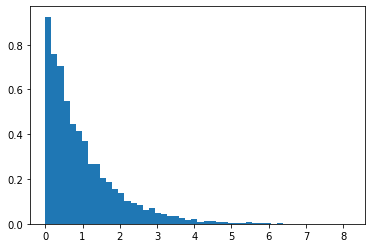

In [98]:
# Plot

plt.hist(exponential.sample(10000).numpy(), bins=50, density=True)

In [99]:
# Define an exponential distribution with a trainable rate parameter

exponential_trainable = tfd.Exponential(rate=tf.Variable(
    0.25,
    name='rate',
    constraint=lambda v: tf.clip_by_value(v, 0, 1)  # probs must be between [eps, 1]
))
exponential_trainable.trainable_variables

(<tf.Variable 'rate:0' shape=() dtype=float32, numpy=0.25>,)

In [100]:
exponential_trainable.rate.value()

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

In [101]:
# Define the negative log likelihood

def nll(dist, x):
    return -tf.reduce_mean(dist.log_prob(x))

In [102]:
# Define a function to compute the loss and gradients

@tf.function
def get_loss_and_grads(dist, x_train):
    with tf.GradientTape() as tape:
        trainables = dist.trainable_variables
        tape.watch(trainables)
        loss = nll(dist, x_train)
        grads = tape.gradient(loss, trainables)
    return loss, grads

In [103]:
# Optimize

def exponential_dist_optimisation(distribution, data, num_steps=10):

    # Keep results for plotting
    train_loss_results = []
    train_rate_results = []
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)

    for i in range(num_steps):
        
        loss, grads = get_loss_and_grads(distribution, data)
        optimizer.apply_gradients(zip(grads, distribution.trainable_variables))
        rate = distribution.rate.value()
        
        train_loss_results.append(loss)
        train_rate_results.append(rate.numpy())
        
        print("Step {:03d}: Loss: {:.3f}: Rate: {:.3f}".format(i, loss, rate))
        
    return train_loss_results, train_rate_results

In [104]:
# Get some data and train

samples = exponential.sample(10000)
train_loss_results, train_rate_results = exponential_dist_optimisation(exponential_trainable, samples, num_steps=200)

Step 000: Loss: 1.636: Rate: 0.400
Step 001: Loss: 1.316: Rate: 0.475
Step 002: Loss: 1.219: Rate: 0.530
Step 003: Loss: 1.165: Rate: 0.575
Step 004: Loss: 1.129: Rate: 0.612
Step 005: Loss: 1.103: Rate: 0.643
Step 006: Loss: 1.084: Rate: 0.671
Step 007: Loss: 1.070: Rate: 0.696
Step 008: Loss: 1.058: Rate: 0.717
Step 009: Loss: 1.049: Rate: 0.737
Step 010: Loss: 1.042: Rate: 0.755
Step 011: Loss: 1.036: Rate: 0.771
Step 012: Loss: 1.031: Rate: 0.786
Step 013: Loss: 1.027: Rate: 0.800
Step 014: Loss: 1.023: Rate: 0.812
Step 015: Loss: 1.020: Rate: 0.824
Step 016: Loss: 1.018: Rate: 0.834
Step 017: Loss: 1.015: Rate: 0.844
Step 018: Loss: 1.013: Rate: 0.854
Step 019: Loss: 1.012: Rate: 0.862
Step 020: Loss: 1.010: Rate: 0.870
Step 021: Loss: 1.009: Rate: 0.878
Step 022: Loss: 1.008: Rate: 0.885
Step 023: Loss: 1.007: Rate: 0.891
Step 024: Loss: 1.006: Rate: 0.897
Step 025: Loss: 1.006: Rate: 0.903
Step 026: Loss: 1.005: Rate: 0.908
Step 027: Loss: 1.004: Rate: 0.913
Step 028: Loss: 1.00

In [105]:
# Predicted value for the rate parameter

exact_value = exponential.rate.numpy()
pred_value = exponential_trainable.rate.numpy()

print("Exact rate:", exact_value)
print("Pred rate:", pred_value)

Exact rate: 1.0
Pred rate: 1.0


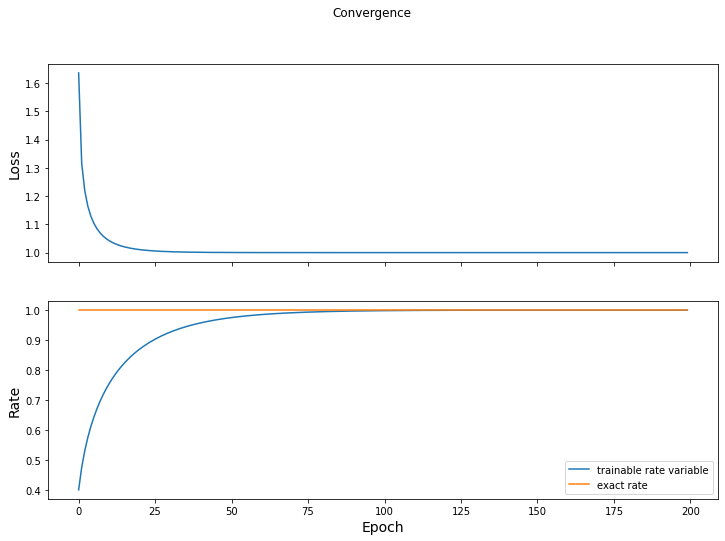

In [106]:
# Plot to see the convergence of the estimated and true parameters

tensor_exact_value = tf.constant(exact_value, shape=[len(train_rate_results)])

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Convergence')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Rate", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_rate_results, label='trainable rate variable')
axes[1].plot(tensor_exact_value, label='exact rate')
axes[1].legend()
plt.show()

In [107]:
# Now we learn the distribution using gradient tape
# So no posterior probabilities need to be calculated

def make_learnable_distributions(data, labels, num_classes, num_steps=100, eps=1e-9):

    class_data = []
    train_vars = []
    distributions = []
    
    # need num_classes learnable distributions, each for p(x | y=c)
    for c in range(num_classes):
        train_vars.append(tf.Variable(
            name='probs_class_{:d}'.format(c),
            initial_value=np.random.uniform(low=0.01, high=0.1, size=data.shape[-1]),
            constraint=lambda v: tf.clip_by_value(v, eps, 1)  # probs must be between [eps, 1]
        ))
        distributions.append(tfd.Bernoulli(probs=train_vars[c]))
        class_mask = (labels == c)
        class_data.append(data[class_mask])

    for c in range(num_classes):
        optimizer = tf.keras.optimizers.Adam()  # reset optimizer
        print('-'*100)
        print('Class:', c)
        print('-'*100)
        # optimize probs for p(x | y=c)
        for i in range(num_steps):
            loss, grads = get_loss_and_grads(distributions[c], class_data[c])
            optimizer.apply_gradients(zip(grads, distributions[c].trainable_variables))
            if (i + 1) % 10 == 0:
                print('iter: {:d}: loss = {:f}, probs ='.format(i+1, loss), distributions[c].trainable_variables)
        # record p(x | y=c)
        train_vars[c] = tf.squeeze(distributions[c].trainable_variables)

    print('\nBernoulli probs:')
    print(train_vars)
        
    dist = tfd.Bernoulli(probs=train_vars)
    dist = tfd.Independent(dist,reinterpreted_batch_ndims=1)

    print('\nOptimized independent Bernoulli distributions:')
    print(dist)

    return dist

In [108]:
# Make the same Naive Bayes classifier we did last tutorial

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories)

smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

priors = class_priors(n_classes=len(categories), labels=train_labels)
tfp_dist = make_distribution(smoothed_counts)

In [109]:
# Now train the distributions with gradient tape

learned_dist = make_learnable_distributions(data=train_data, labels=train_labels, num_classes=4)

----------------------------------------------------------------------------------------------------
Class: 0
----------------------------------------------------------------------------------------------------
iter: 10: loss = 0.070337, probs = (<tf.Variable 'probs_class_0:0' shape=(17495,) dtype=float64, numpy=
array([0.04662072, 0.02300195, 0.01633129, ..., 0.00240116, 0.04447366,
       0.05884606])>,)
iter: 20: loss = 0.061759, probs = (<tf.Variable 'probs_class_0:0' shape=(17495,) dtype=float64, numpy=
array([3.68579292e-02, 2.30937098e-02, 6.48975844e-03, ...,
       1.00000000e-09, 3.46288342e-02, 4.89995617e-02])>,)
iter: 30: loss = 0.054348, probs = (<tf.Variable 'probs_class_0:0' shape=(17495,) dtype=float64, numpy=
array([2.72427471e-02, 2.27070701e-02, 1.00000000e-09, ...,
       1.00000000e-09, 2.47856764e-02, 3.91556566e-02])>,)
iter: 40: loss = 0.048051, probs = (<tf.Variable 'probs_class_0:0' shape=(17495,) dtype=float64, numpy=
array([1.79932306e-02, 2.30330557e-02, 1

iter: 60: loss = 0.040181, probs = (<tf.Variable 'probs_class_3:0' shape=(17495,) dtype=float64, numpy=
array([0.01029247, 0.02760121, 0.02849523, ..., 0.00613089, 0.03458293,
       0.00275803])>,)
iter: 70: loss = 0.037097, probs = (<tf.Variable 'probs_class_3:0' shape=(17495,) dtype=float64, numpy=
array([1.04211524e-02, 2.16283342e-02, 1.87961759e-02, ...,
       4.91266678e-03, 2.48849827e-02, 1.00000000e-09])>,)
iter: 80: loss = 0.034908, probs = (<tf.Variable 'probs_class_3:0' shape=(17495,) dtype=float64, numpy=
array([1.08000074e-02, 1.80317891e-02, 9.14025382e-03, ...,
       5.20219355e-03, 1.52304861e-02, 1.00000000e-09])>,)
iter: 90: loss = 0.033563, probs = (<tf.Variable 'probs_class_3:0' shape=(17495,) dtype=float64, numpy=
array([1.05958418e-02, 1.70489149e-02, 1.00000000e-09, ...,
       5.50651725e-03, 5.61928608e-03, 1.00000000e-09])>,)
iter: 100: loss = 0.032963, probs = (<tf.Variable 'probs_class_3:0' shape=(17495,) dtype=float64, numpy=
array([1.05522867e-02, 1.76

In [110]:
# Compare the two results

for name, dist in zip(['learned distribution', 'defined distribution'], [learned_dist,tfp_dist]):
    probabilities = []
    for sample, label in zip(test_data, test_labels):
        probabilities.append(predict_sample(dist, sample, priors))

    probabilities = np.asarray(probabilities)
    predicted_classes = np.argmax(probabilities, axis =-1)
    print('F1 score from {:s}:'.format(name), f1_score(test_labels, predicted_classes, average='macro'))

F1 score from learned distribution: 0.8748667324627903
F1 score from defined distribution: 0.8799168247497399
